In [2]:
import cv2
import numpy as np
from MTM import matchTemplates, drawBoxesOnRGB

import cv2
from skimage.data import coins
from skimage.data import immunohistochemistry
import matplotlib.pyplot as plt

c:\Users\user1\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
from multi_scale_edge_detection.MultiScaleContourDetector import multi_scale_contour_detection_with_inhibition

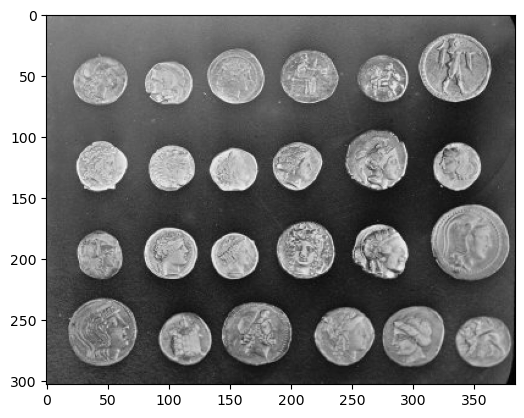

In [4]:
image = coins()
plt.imshow(image, cmap="gray")

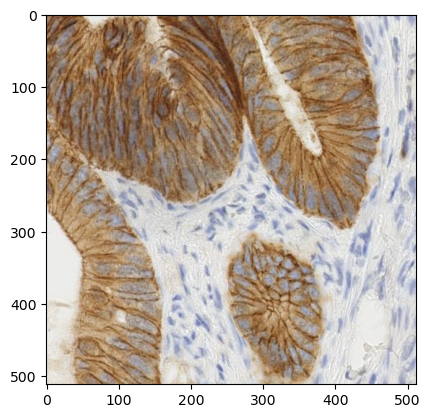

In [4]:
image1 = immunohistochemistry()
plt.imshow(image1, cmap="gray")

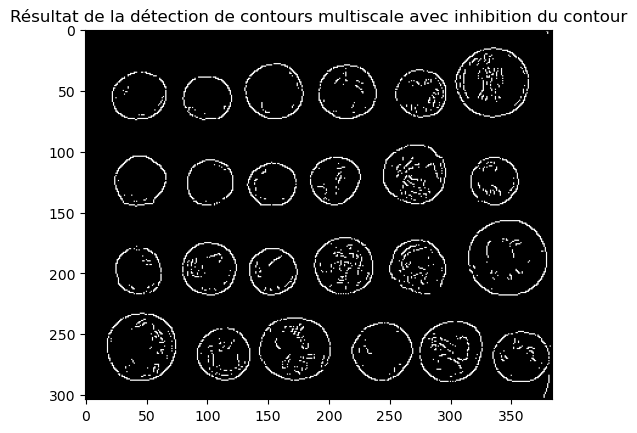

In [5]:
result = multi_scale_contour_detection_with_inhibition(image, N=5, sigma=1, alpha=0.00001)

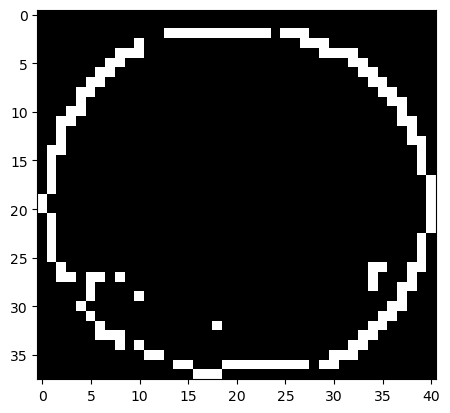

In [6]:
smallCoin = result[37:37+38, 80:80+41] 


plt.imshow(smallCoin, cmap="gray")

In [47]:
# 1st format the template into a list of tuple (label, templateImage)
listTemplate = [('small', smallCoin)]

# Then call the function matchTemplates (here a single template)
Hits = matchTemplates(listTemplate, result, score_threshold=0.3, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)

In [45]:
print("Found {} hits".format( len(Hits.index) ) )
Hits

Found 1 hits


TemplateName              BBox  Score
0        small  (80, 37, 41, 38)    1.0

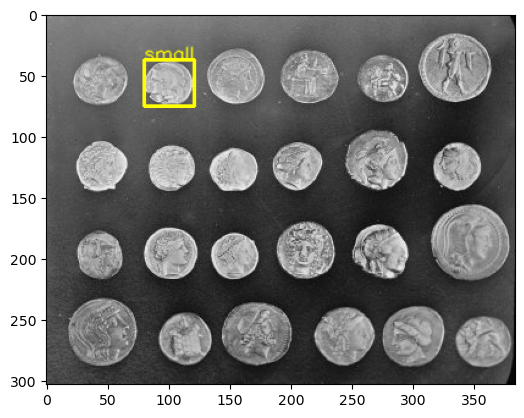

In [46]:
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

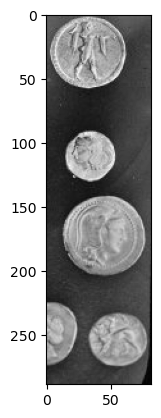

In [8]:
largeCoin = coins()[14:14+459,302:402+65]

plt.imshow(largeCoin, cmap="gray")

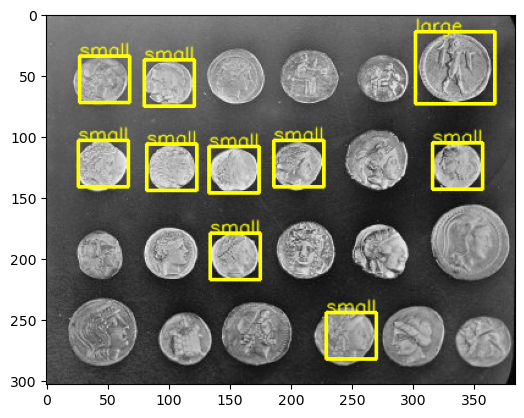

In [49]:
listTemplate = [("small", smallCoin), ("large", largeCoin)]
Hits = matchTemplates(listTemplate, result, score_threshold=0.3, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

In [50]:
import cv2

# Path to the video file
video_path = 'boat.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file was successfully opened
if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Initialize an empty list to store frames
frames = []

# Read the video frame by frame
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        break

    # Append the frame to the frames list
    frames.append(frame)

# Release the video capture object
cap.release()

# Convert the list of frames to a numpy array
frames_array = np.array(frames)

# Print the shape of the frames array
print("Shape of frames array:", frames_array.shape)


Shape of frames array: (300, 720, 1280, 3)


In [55]:
normalized_frames = []

# Iterate over each frame array
for frame in frames_array:
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Normalize the pixel values to range [0, 1]
    normalized_frame = gray_frame / 255.0
    
    # Append the normalized grayscale frame to the list
    normalized_frames.append(normalized_frame)

print("Normalization and storing completed.")

Normalization and storing completed.


In [ ]:
# Create an empty list to store the results
results_list = []

# Iterate over each normalized grayscale frame
for frame in normalized_frames:
    # Apply the function to the current frame and store the result
    result = multi_scale_contour_detection_with_inhibition(frame, N=8, sigma=1, alpha=0.00001)
    
    # Append the result to the results_list
    results_list.append(result)

print("Multi-scale contour detection completed for all frames.")

In [56]:
resy = len(results_list)
resy

169

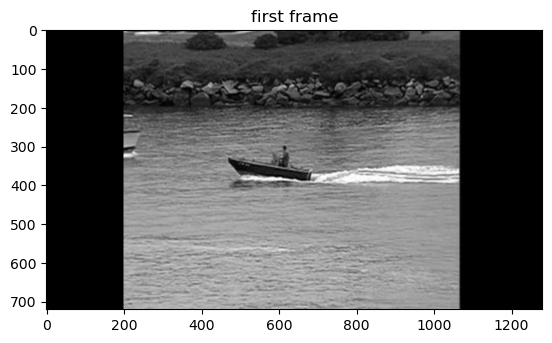

In [57]:
frame1 = normalized_frames[0]
plt.imshow(frame1 , cmap='gray')
plt.title('first frame')
plt.show()

In [63]:
import cv2
import numpy as np

# Convert the image to grayscale
gray_image = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Normalize the pixel values to range [0, 1]
normalized_image = gray_image / 255.0

# Save the images to files
cv2.imwrite('original_image.jpg', gray_image)
cv2.imwrite('normalized_image.jpg', normalized_image * 255.0)

print("Images saved successfully.")

Images saved successfully.


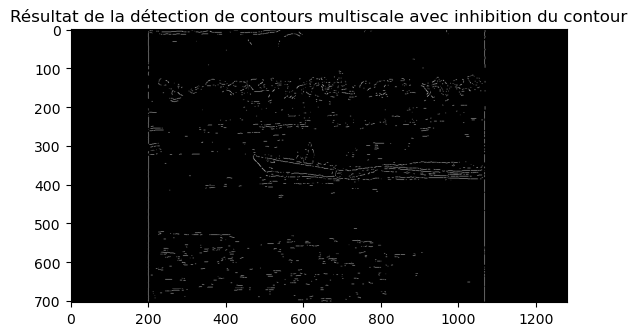

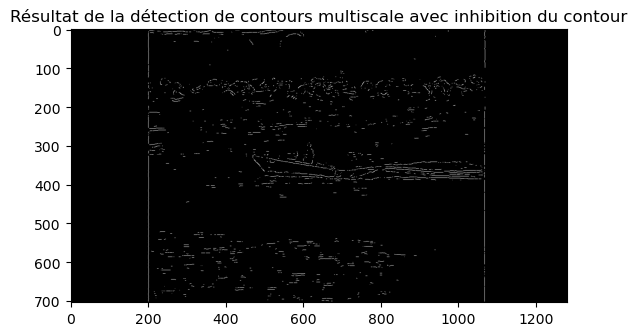

In [58]:
results1 = multi_scale_contour_detection_with_inhibition(frame1, N=6, sigma=1, alpha=0.00001)
results2 = multi_scale_contour_detection_with_inhibition(normalized_frames[1], N=6, sigma=1, alpha=0.00001)

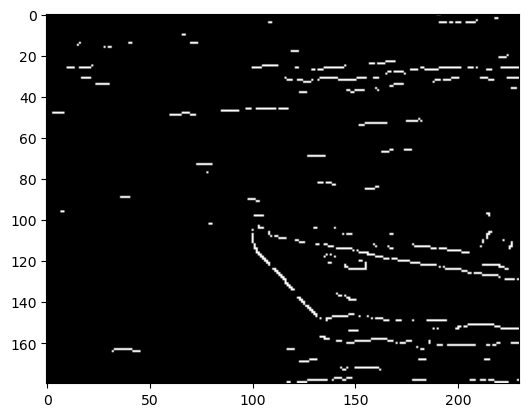

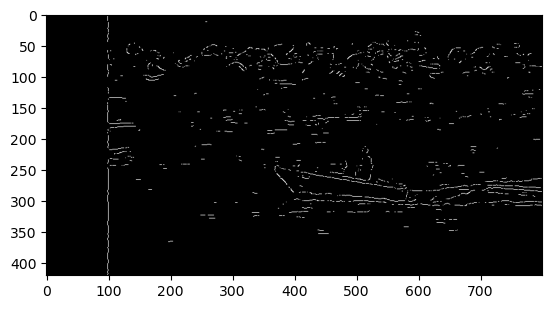

In [60]:
temp1 = results1[220:400,370:600]
temp2 = results2[80:500,100:900]
plt.figure(0)
plt.imshow(temp1, cmap="gray")
plt.figure(1)
plt.imshow(temp2, cmap="gray")

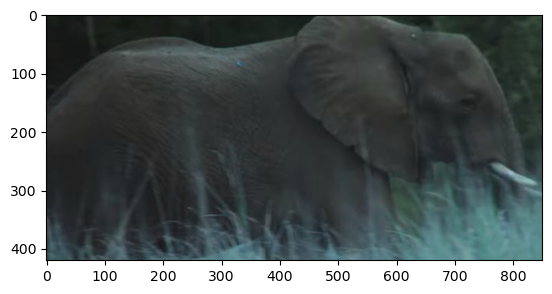

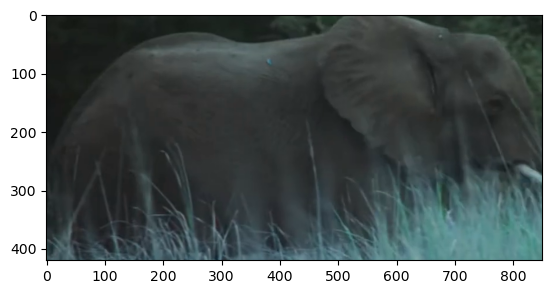

In [24]:
temp3 = frames[0][80:500,100:950]
temp4 = frames[15][80:500,100:950]
plt.figure(0)
plt.imshow(temp3, cmap="gray")
plt.figure(1)
plt.imshow(temp4, cmap="gray")

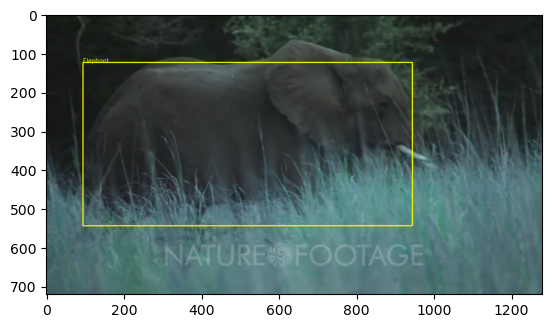

In [31]:
listTemplate = [("Elephant", temp4), ("ELEPHANT", temp3)]
Hits = matchTemplates(listTemplate, frames[250], score_threshold=0.5, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(frames_array[15], Hits, showLabel=True)
plt.imshow(Overlay)

In [30]:
print("Found {} hits".format( len(Hits.index) ) )
Hits

Found 0 hits


Empty DataFrame
Columns: [TemplateName, BBox, Score]
Index: []

## using edge distance  


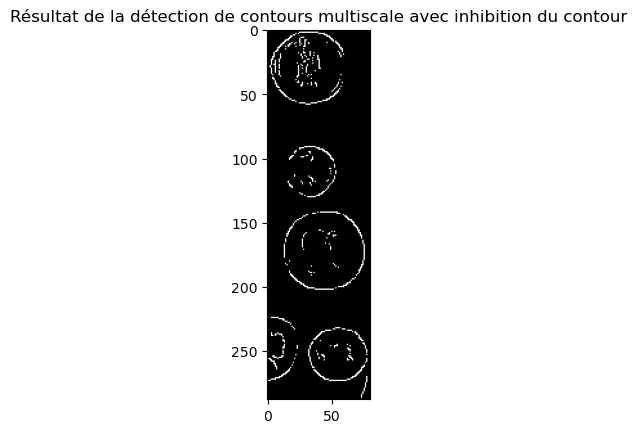

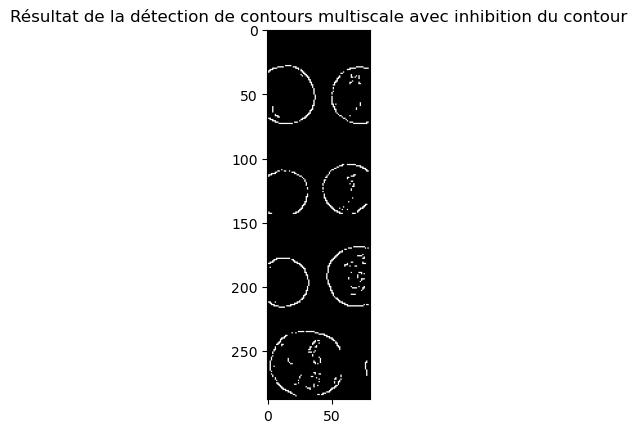

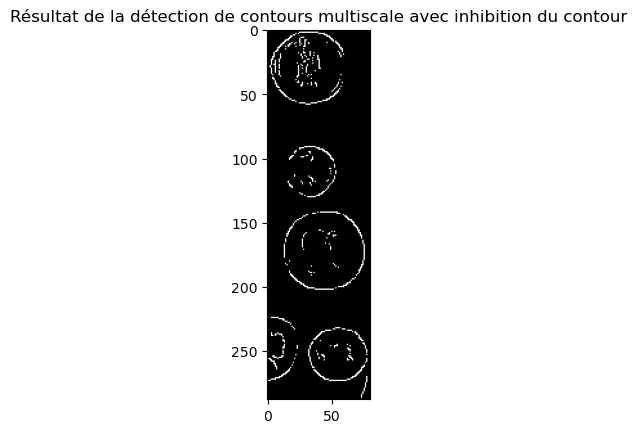

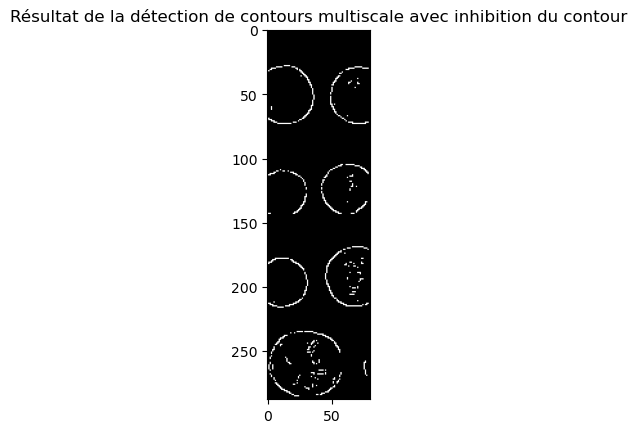

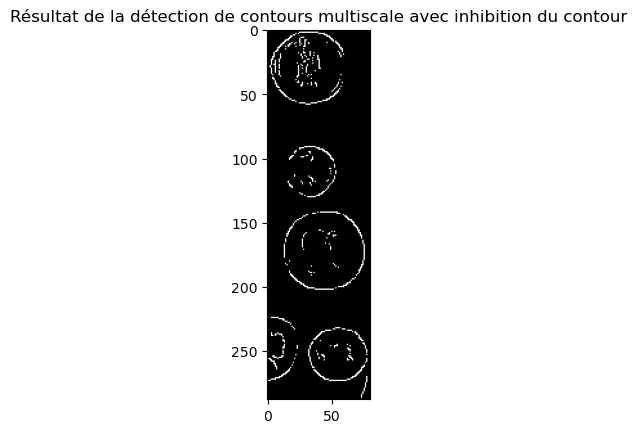

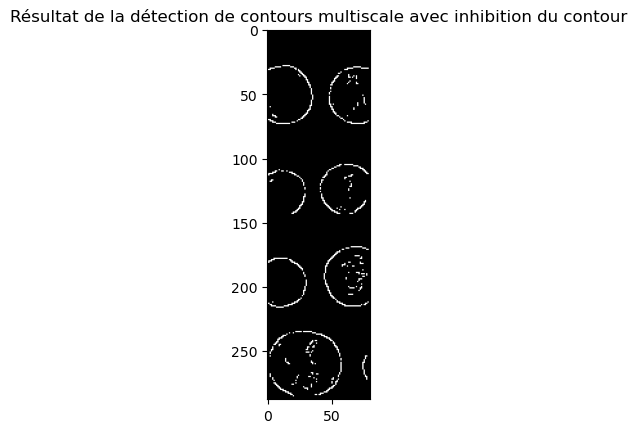

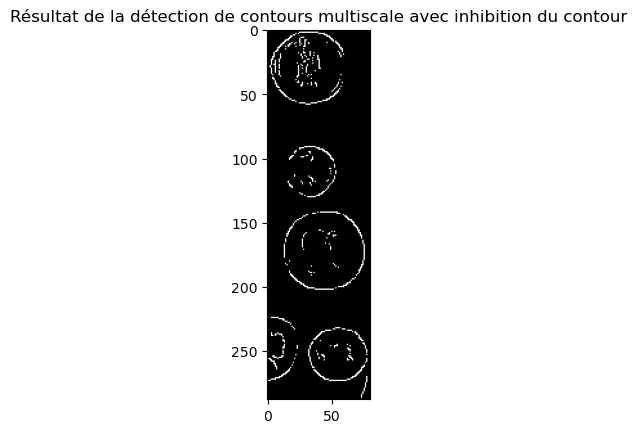

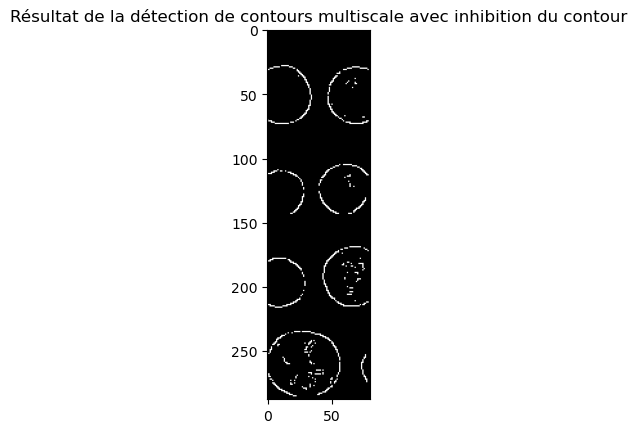

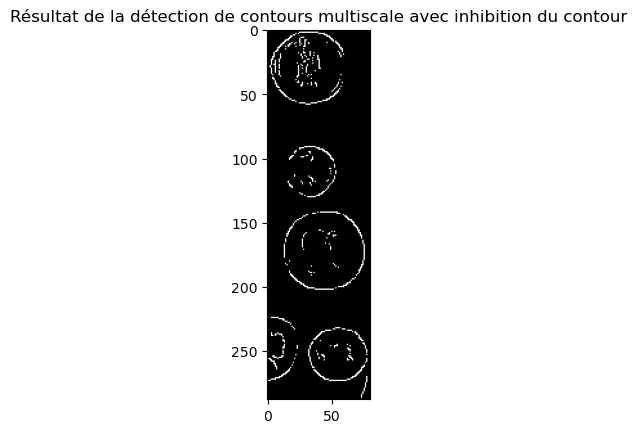

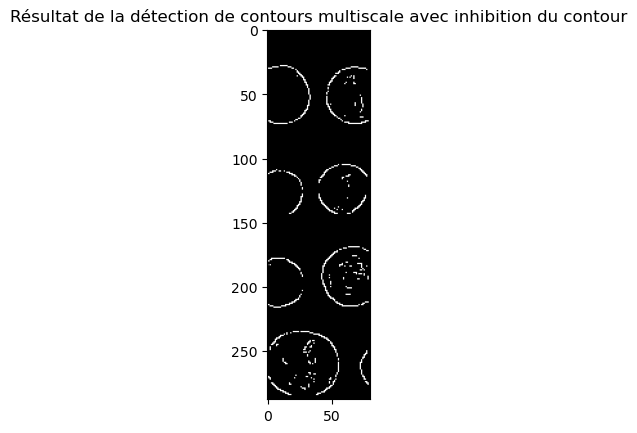

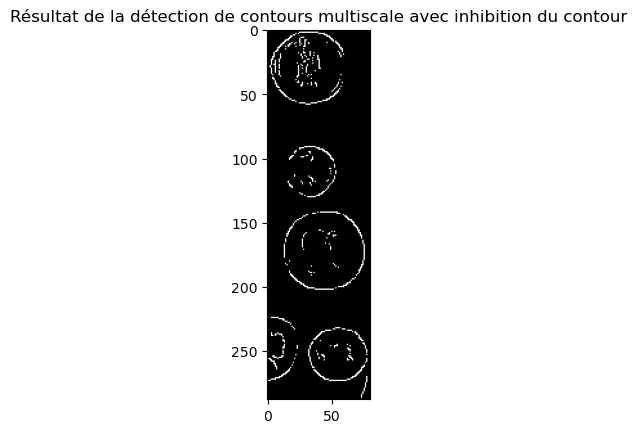

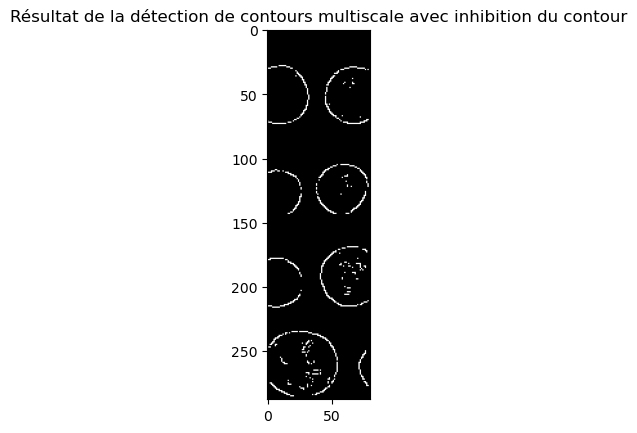

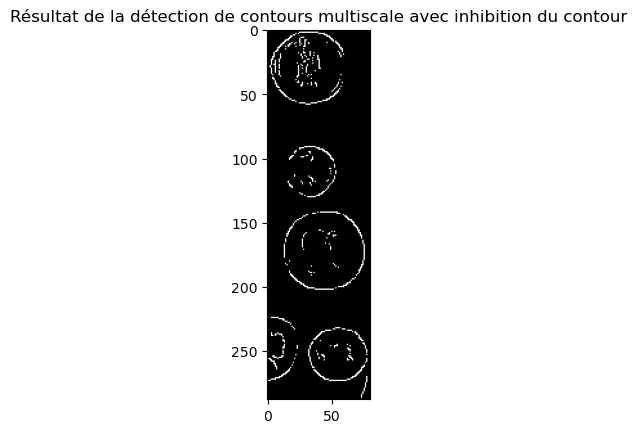

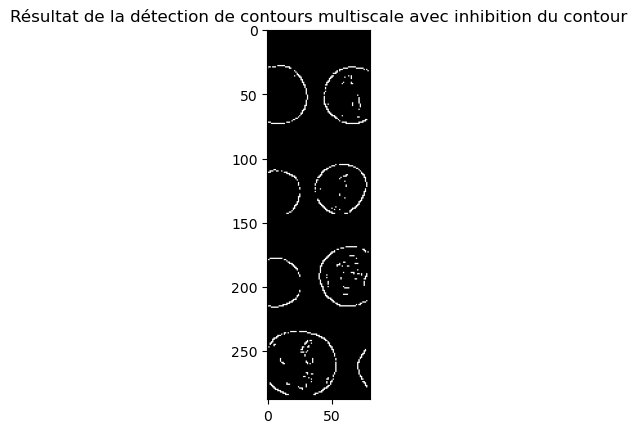

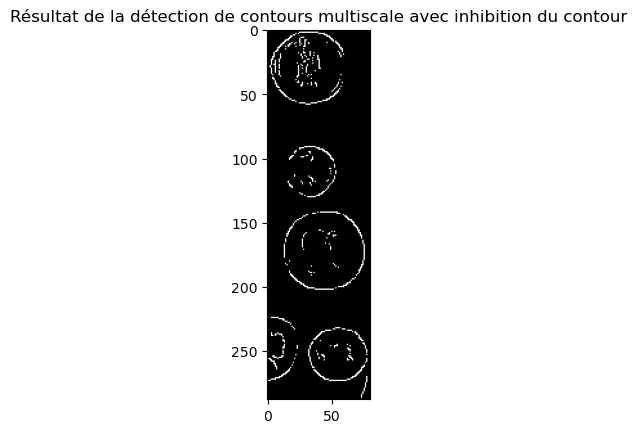

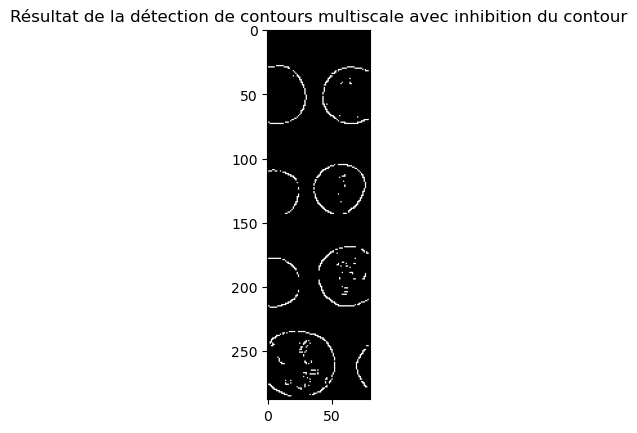

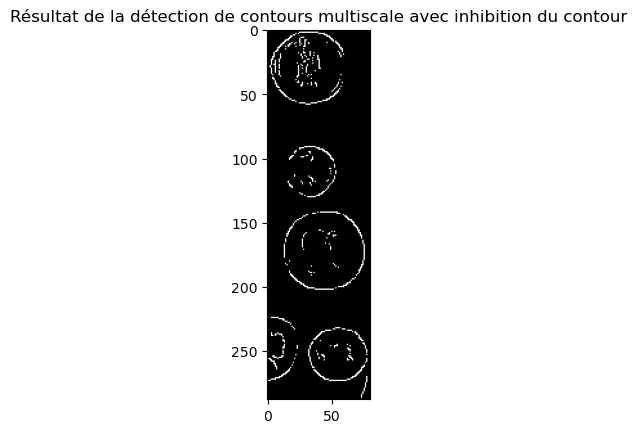

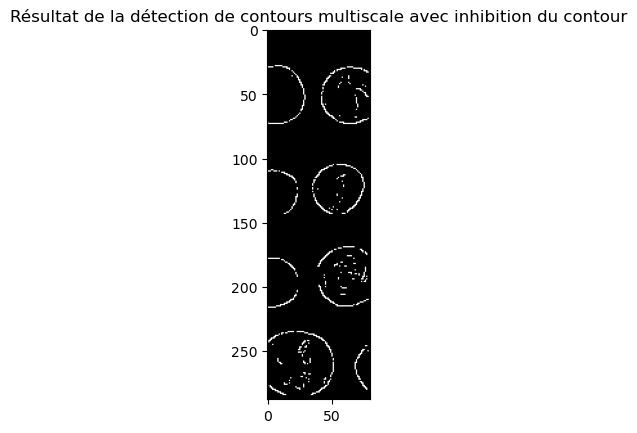

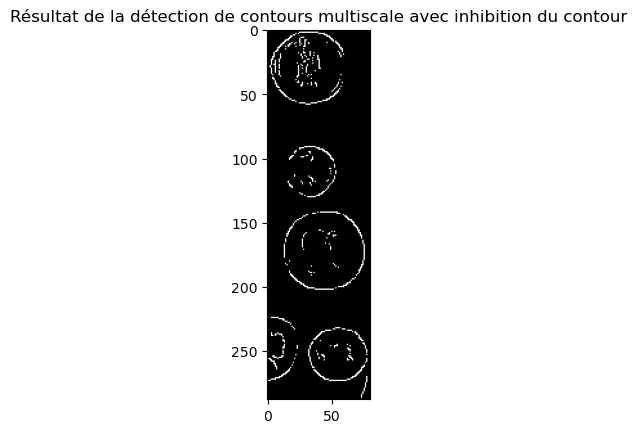

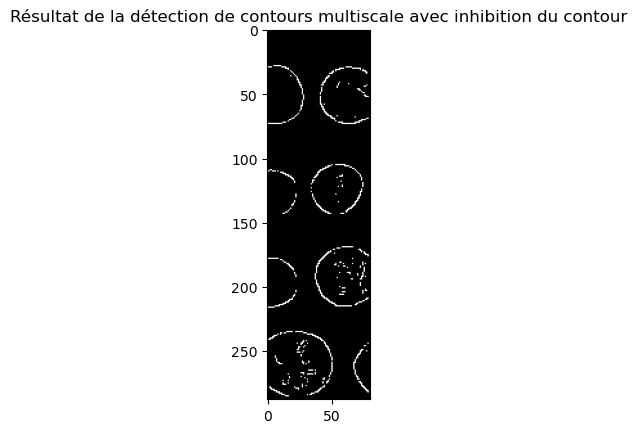

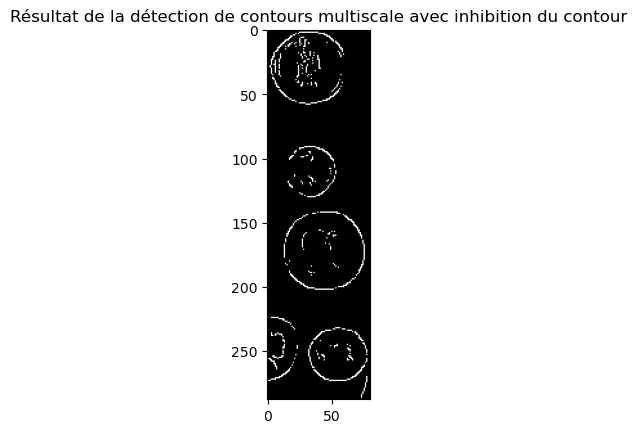

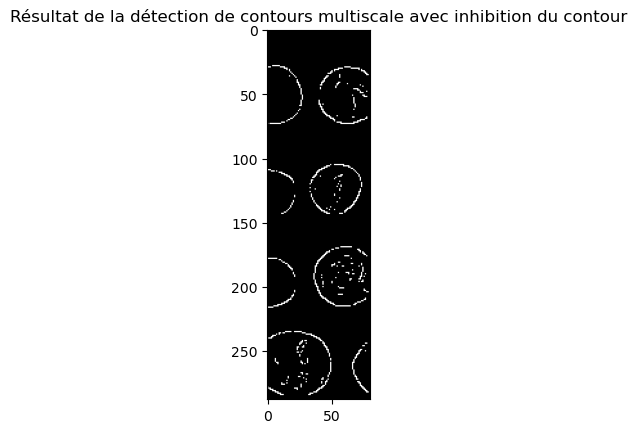

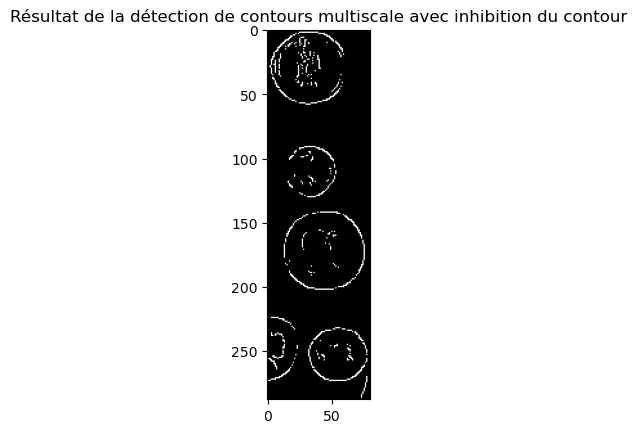

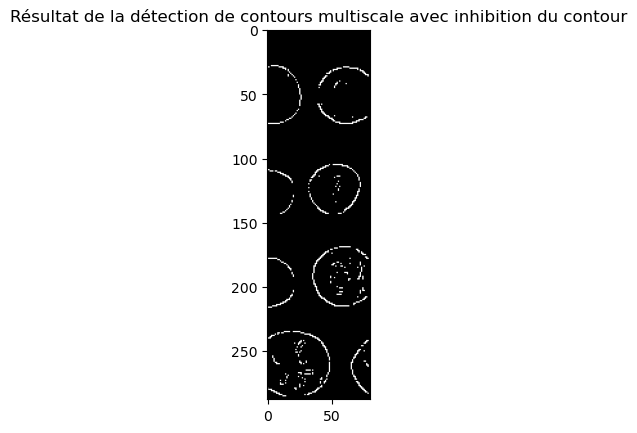

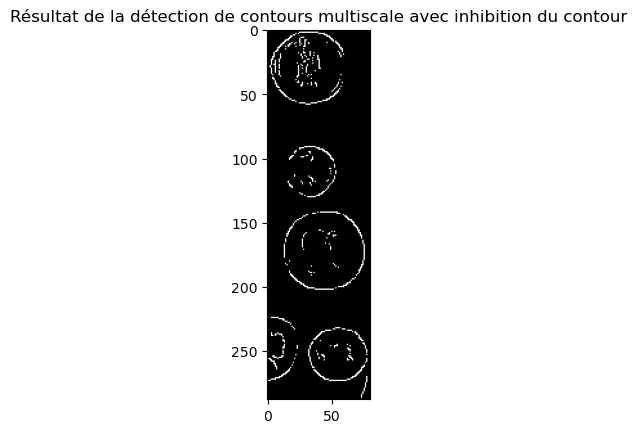

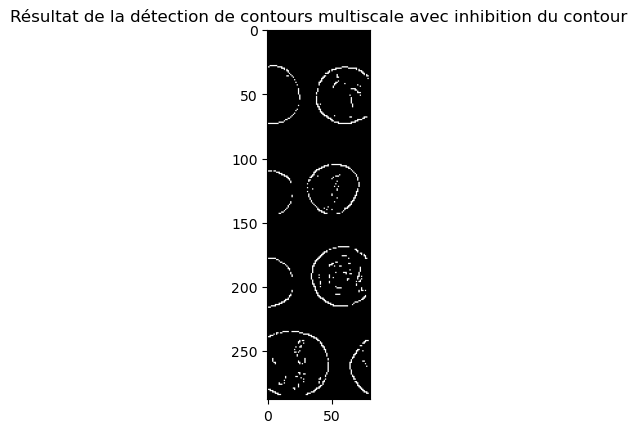

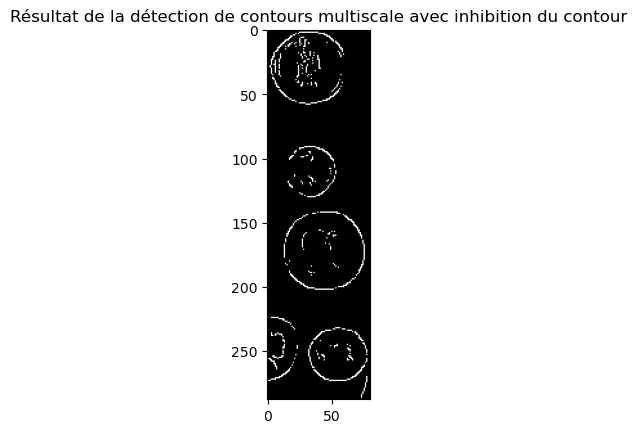

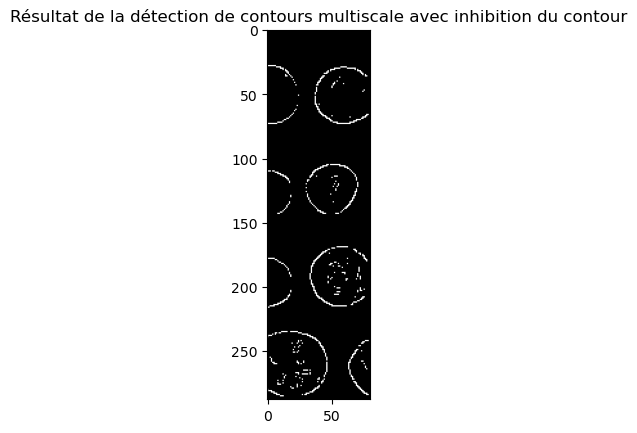

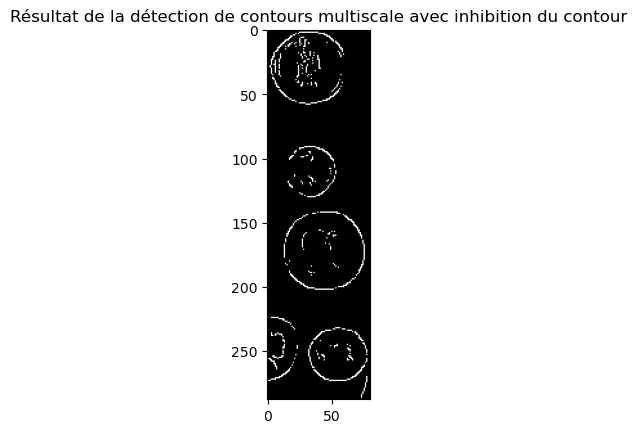

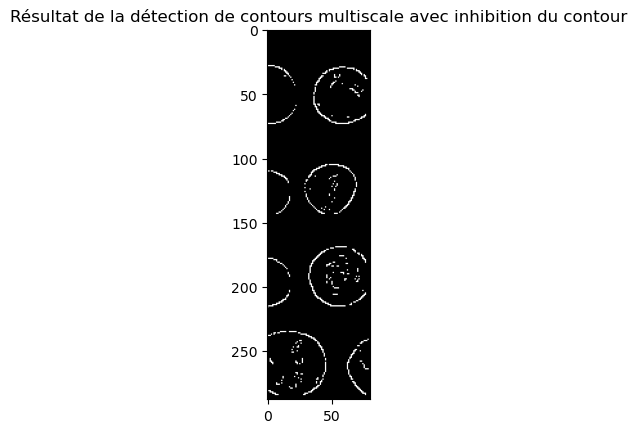

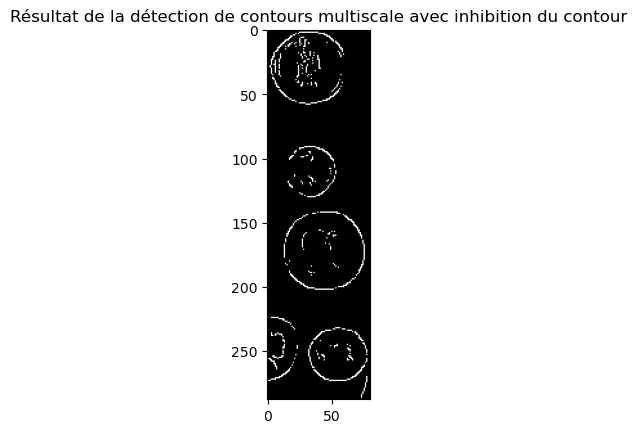

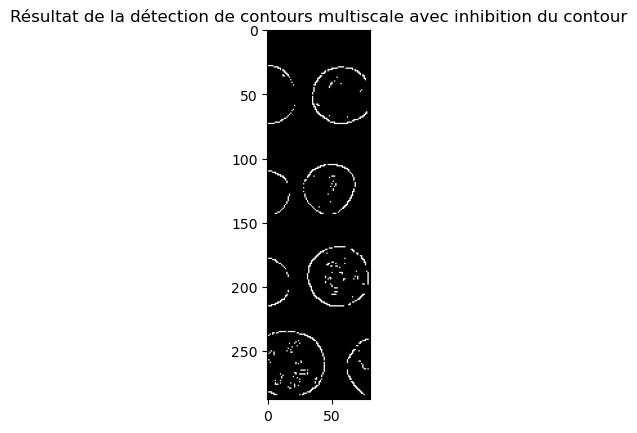

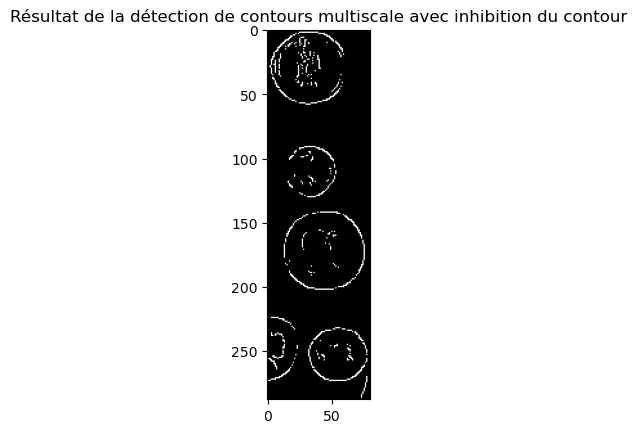

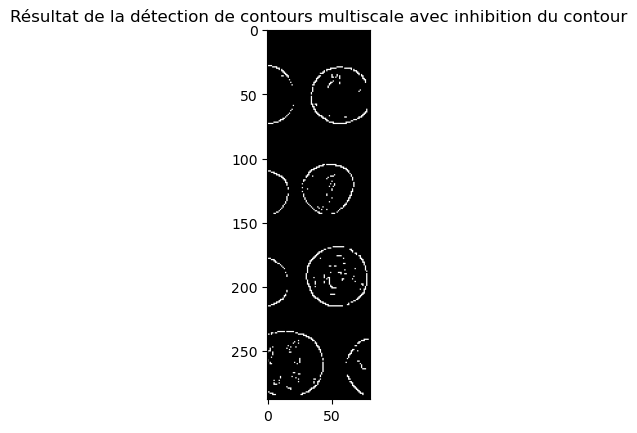

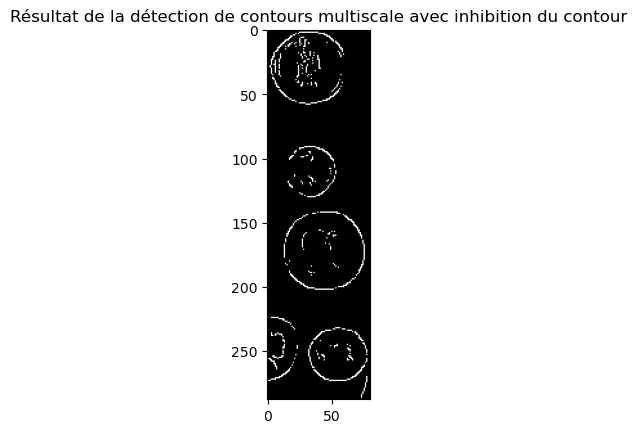

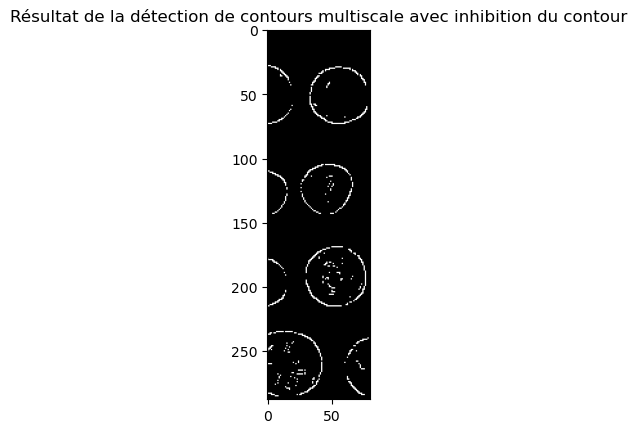

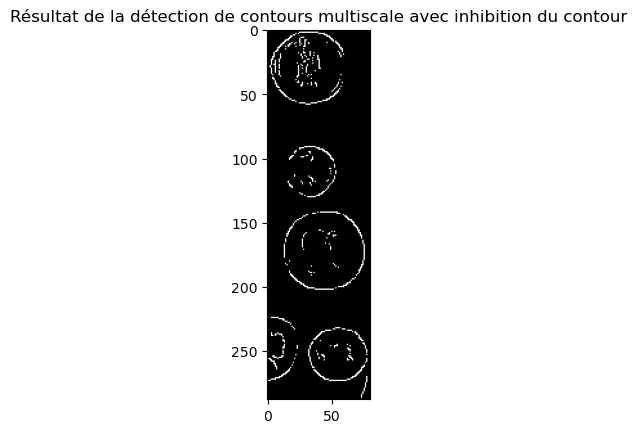

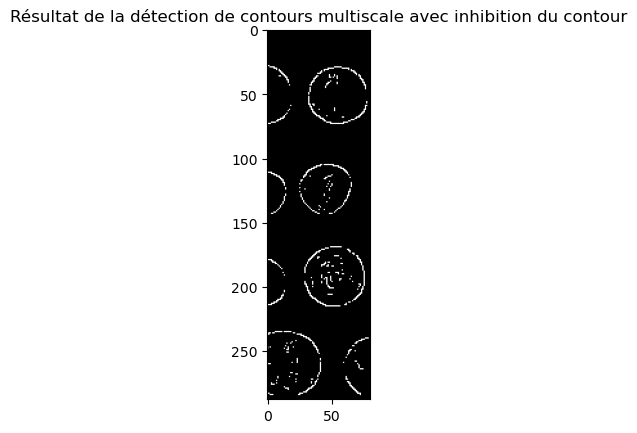

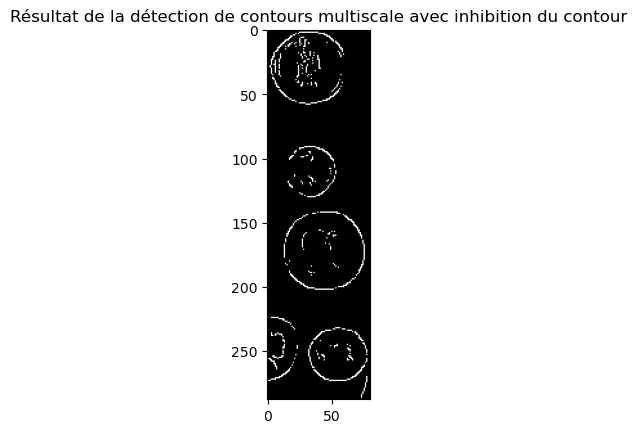

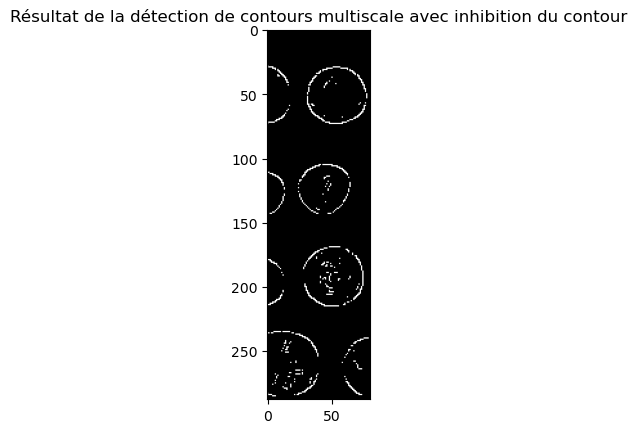

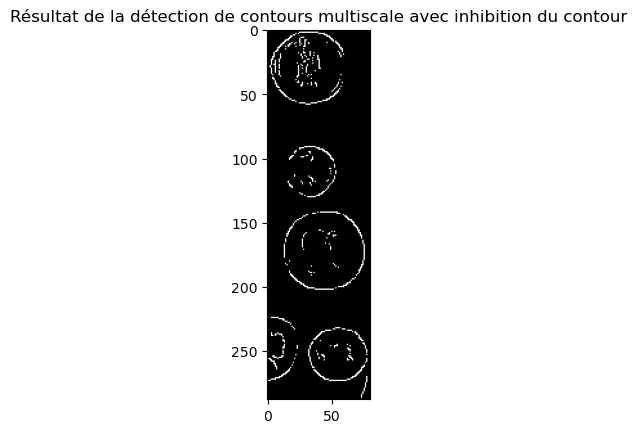

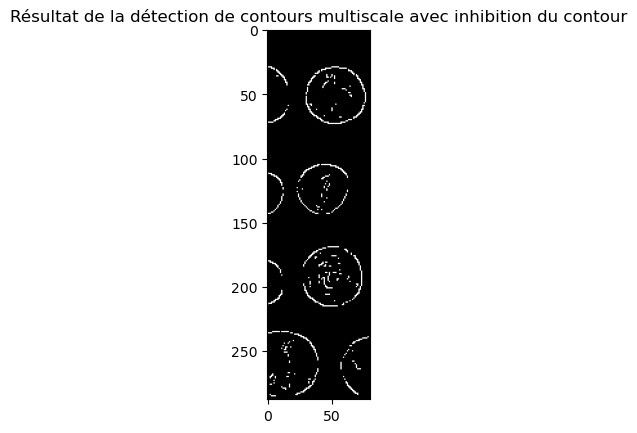

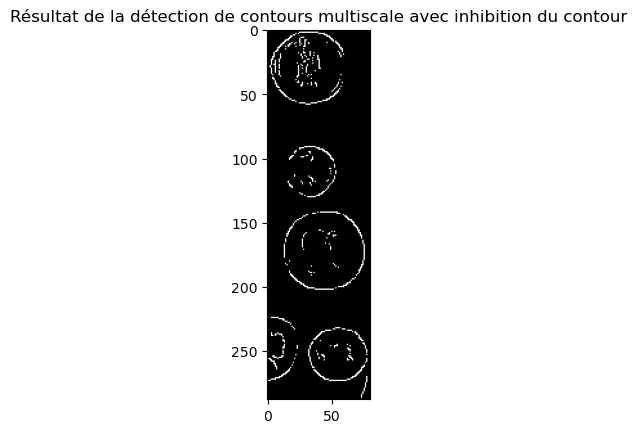

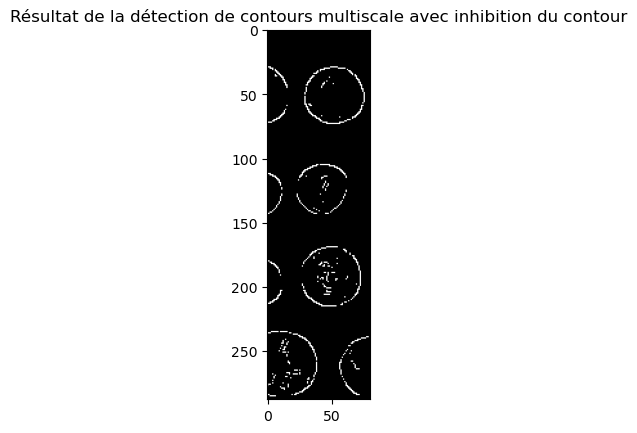

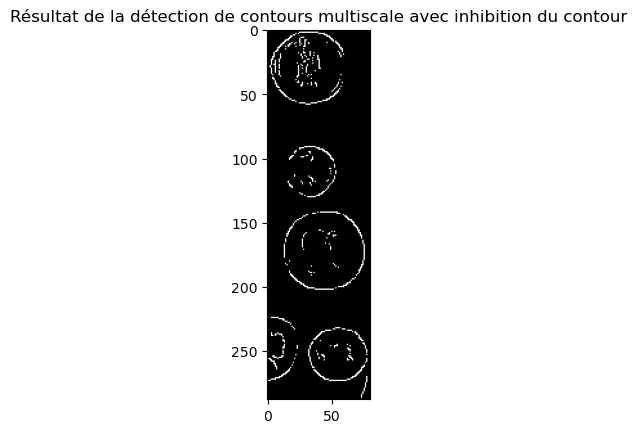

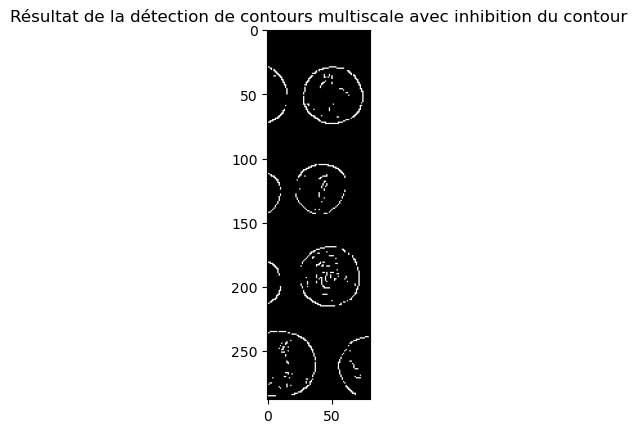

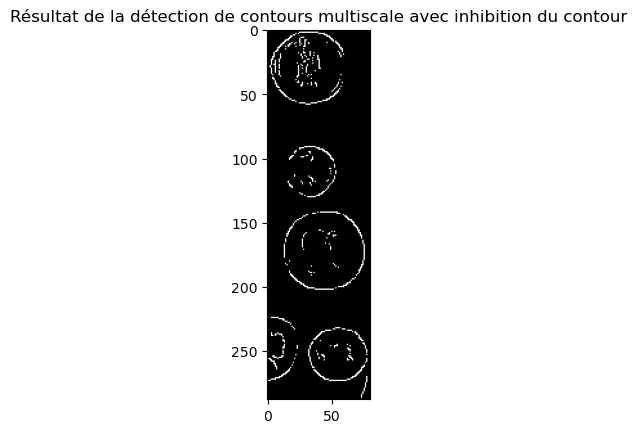

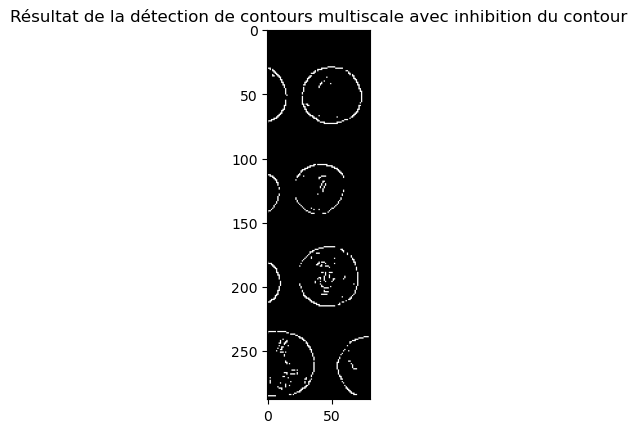

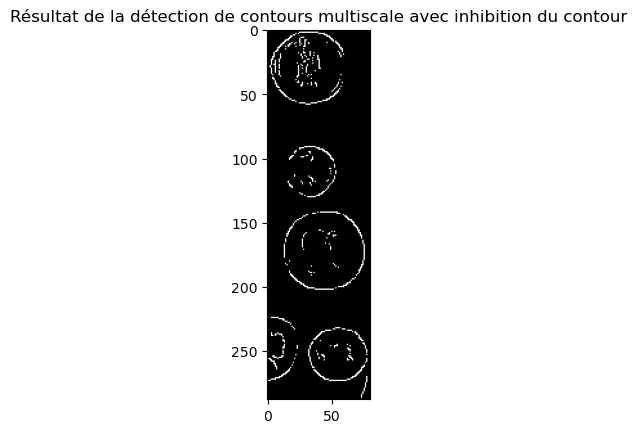

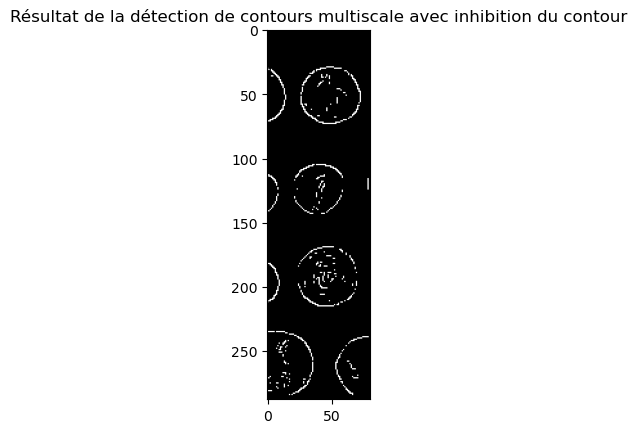

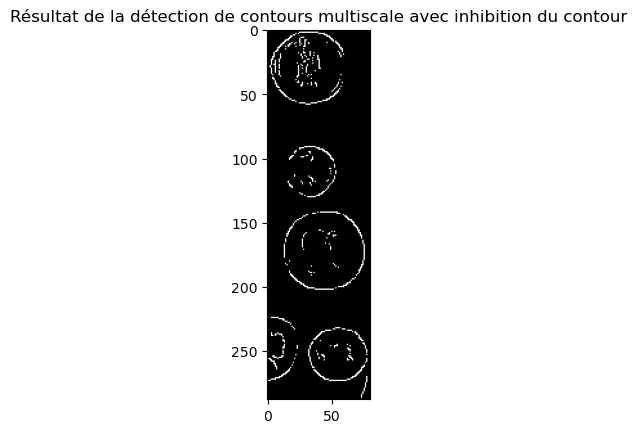

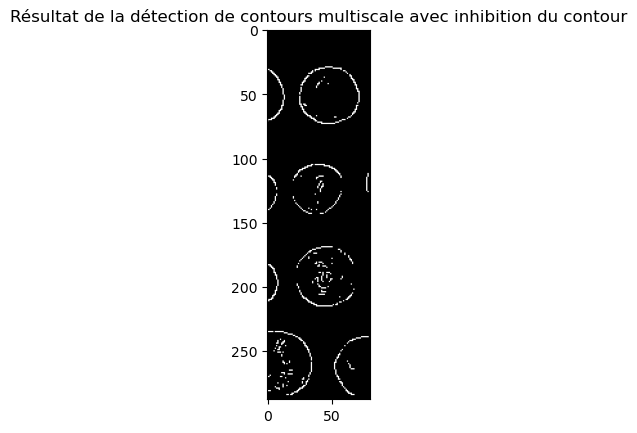

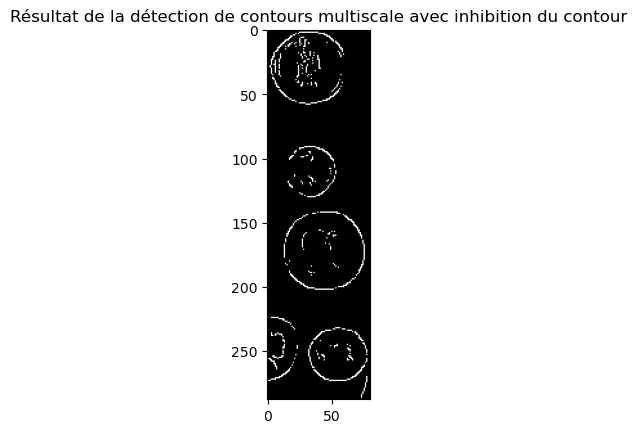

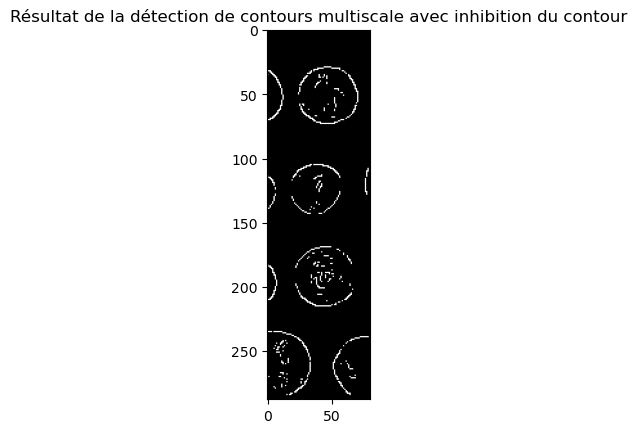

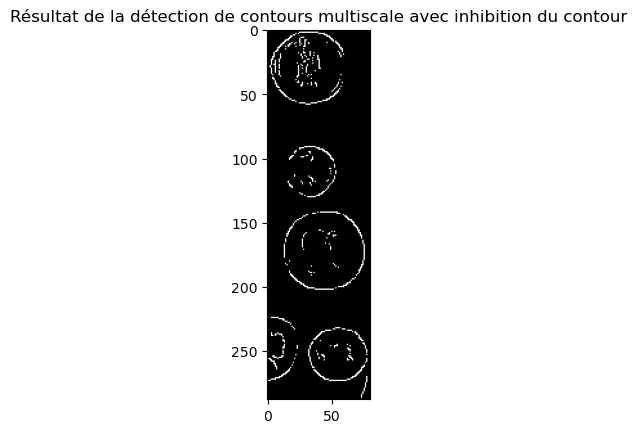

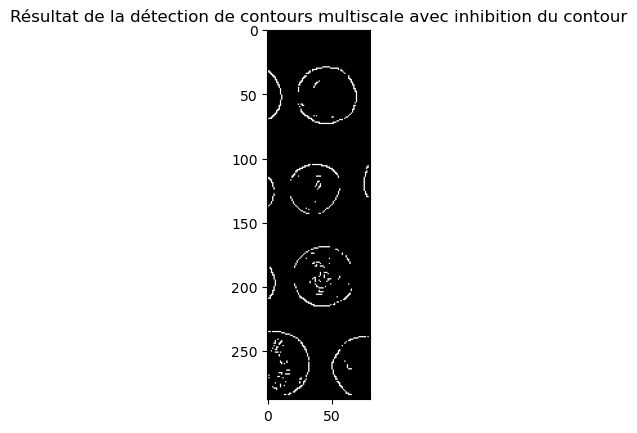

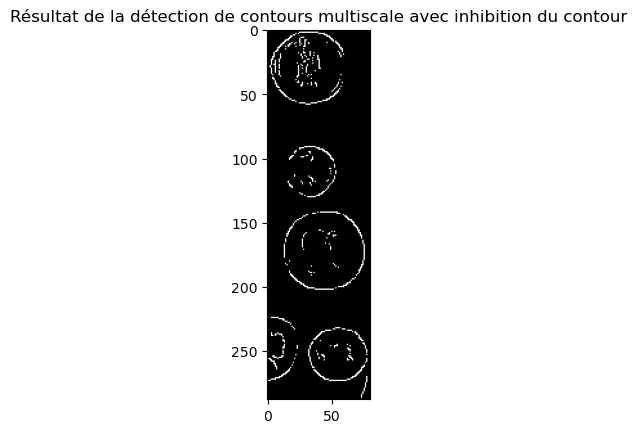

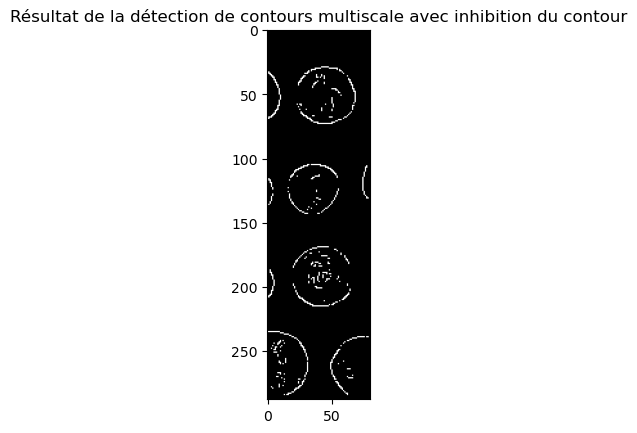

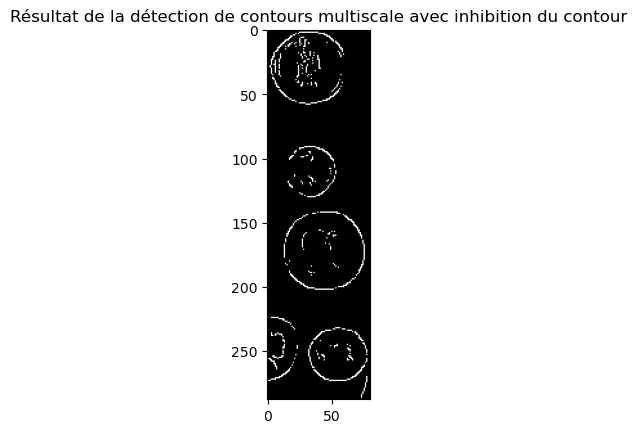

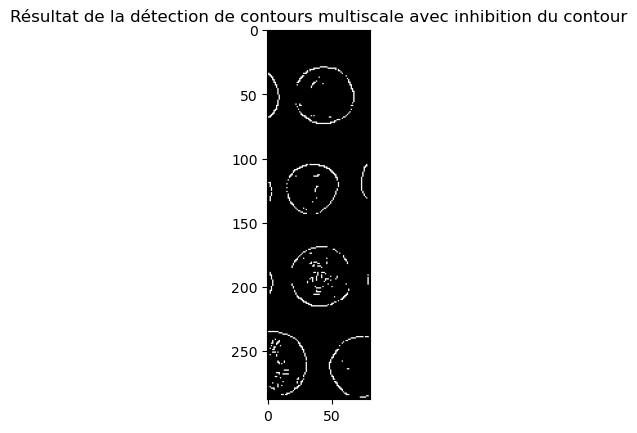

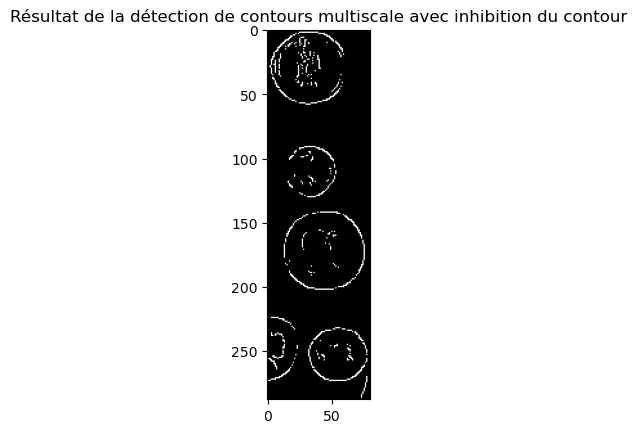

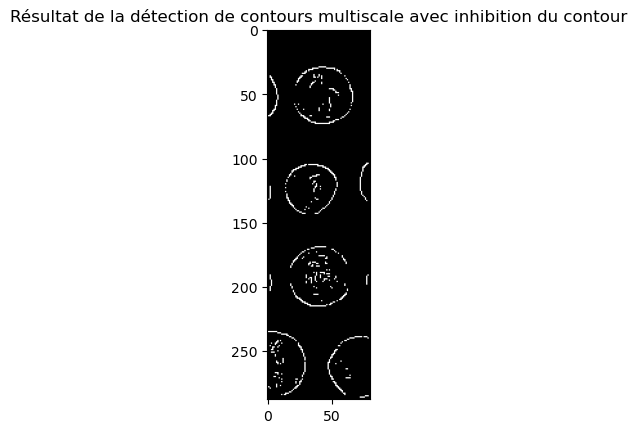

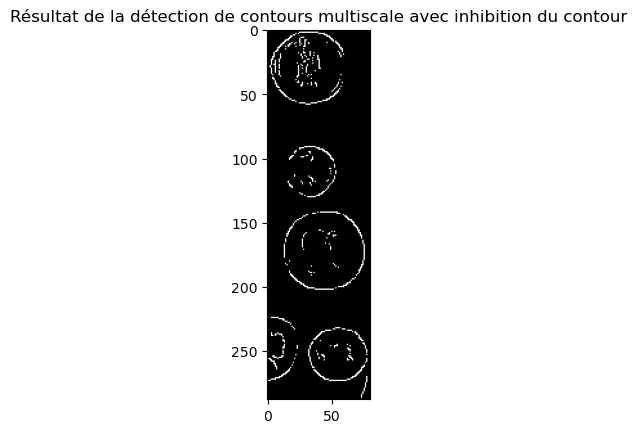

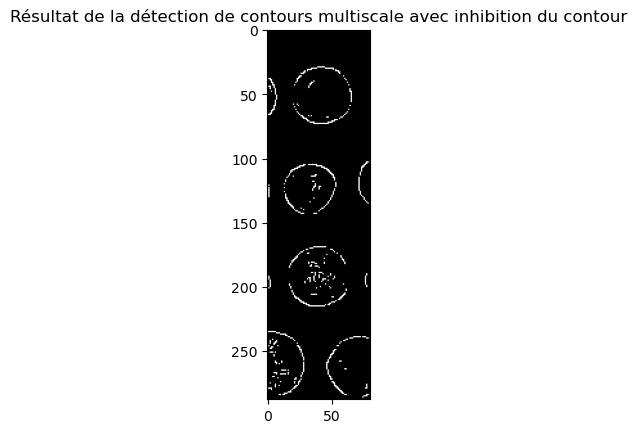

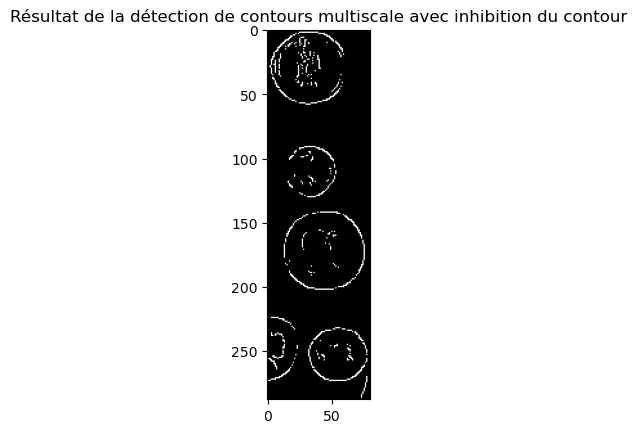

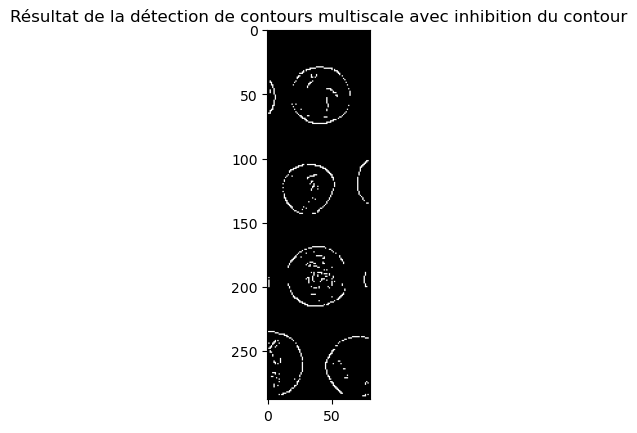

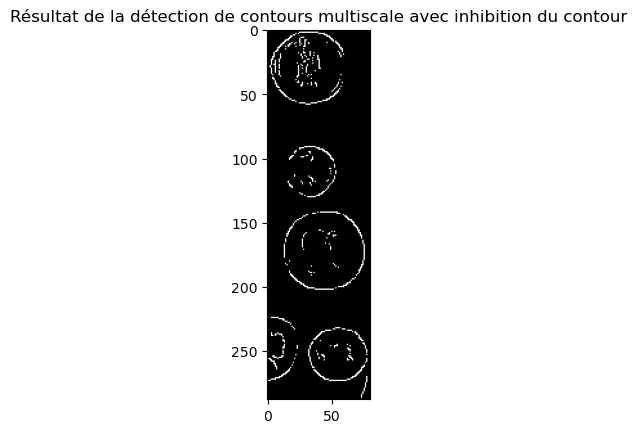

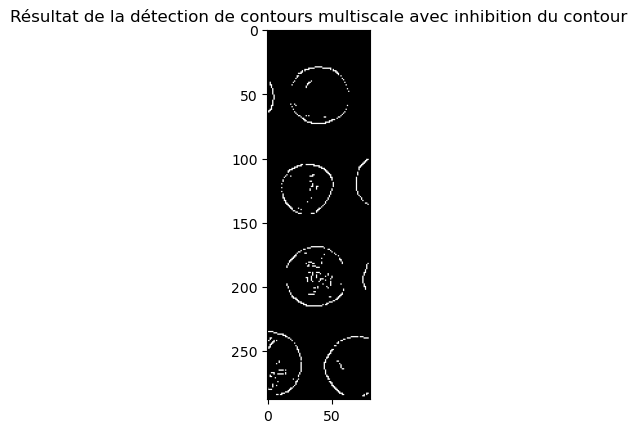

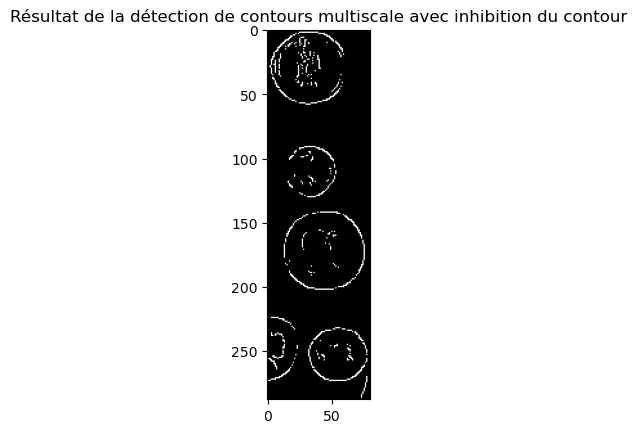

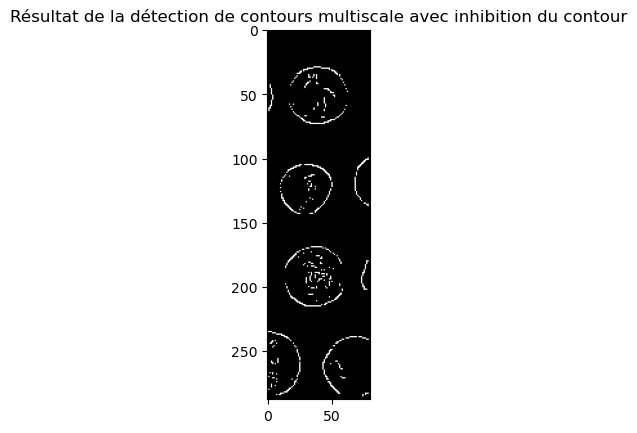

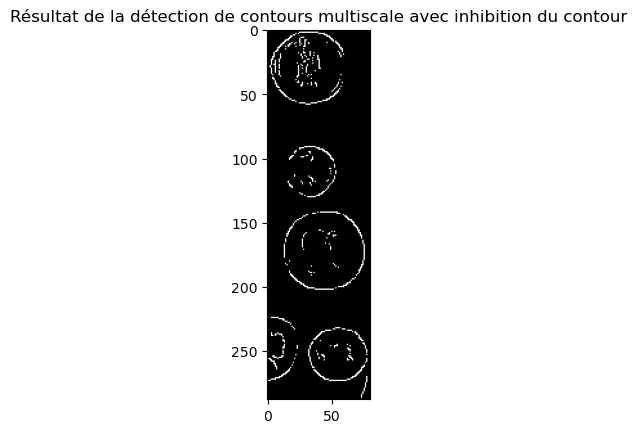

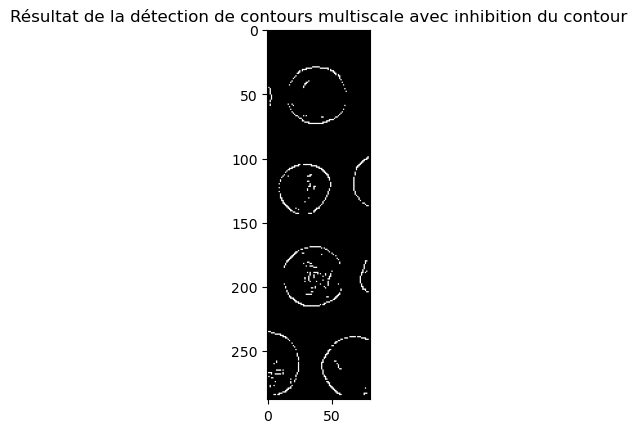

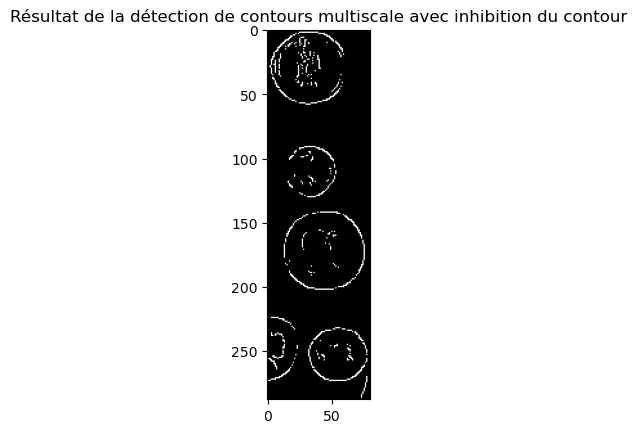

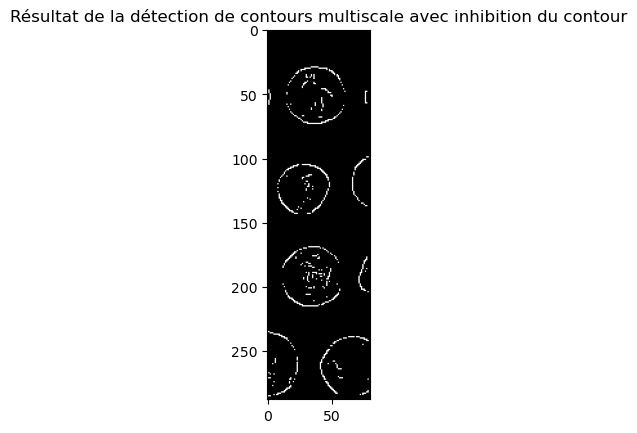

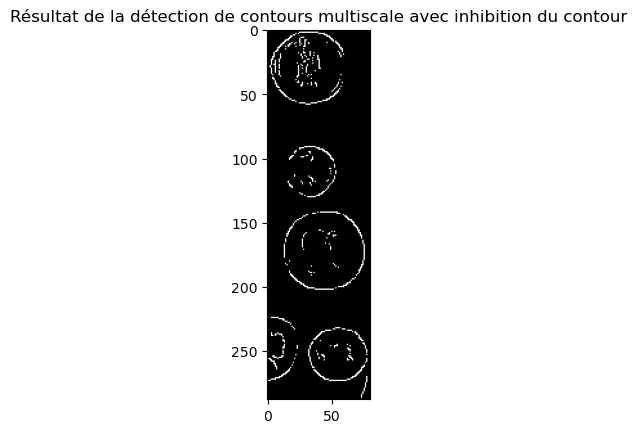

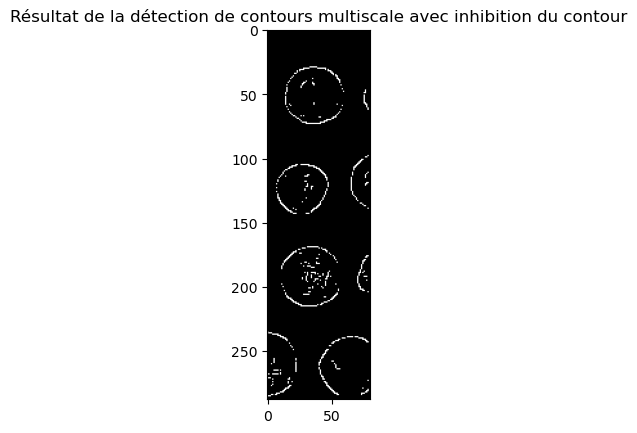

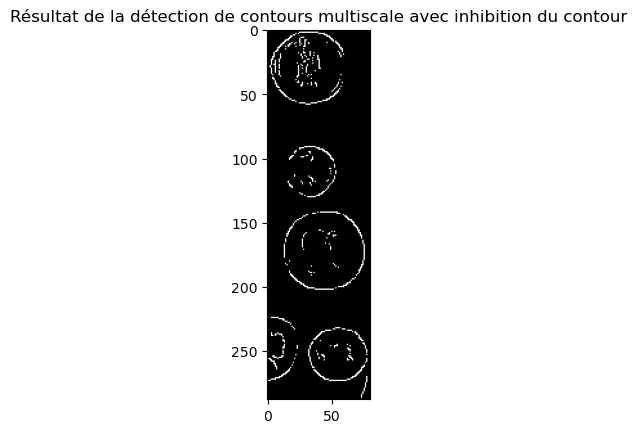

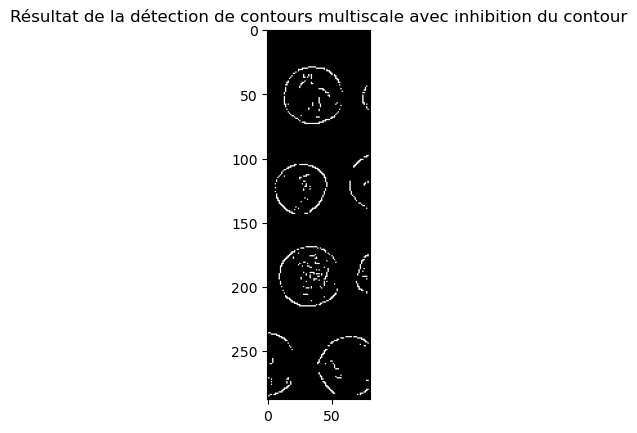

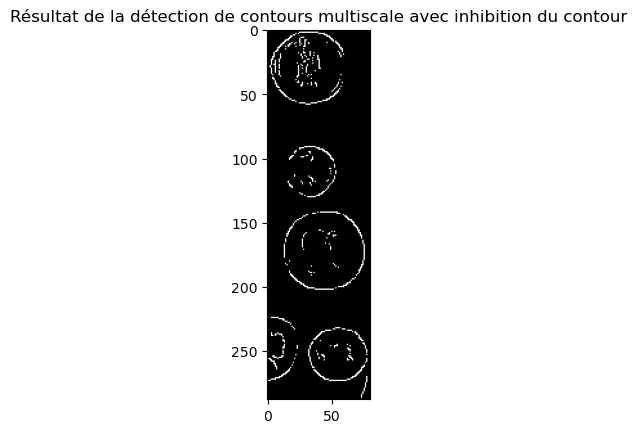

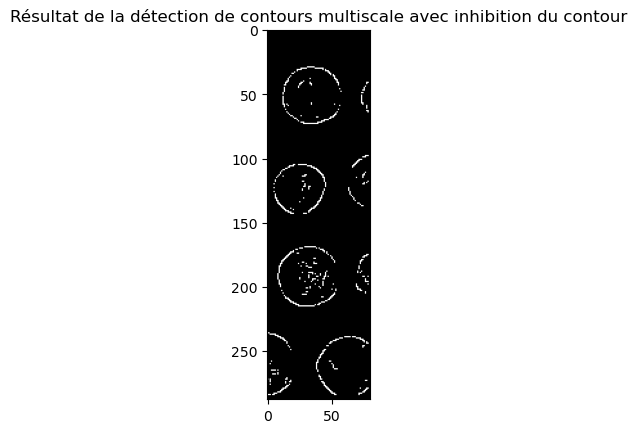

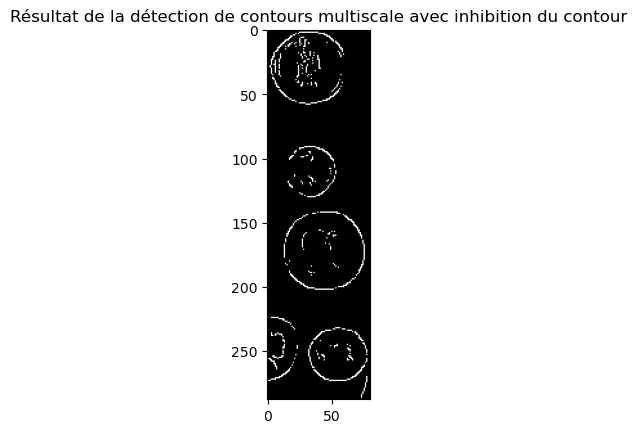

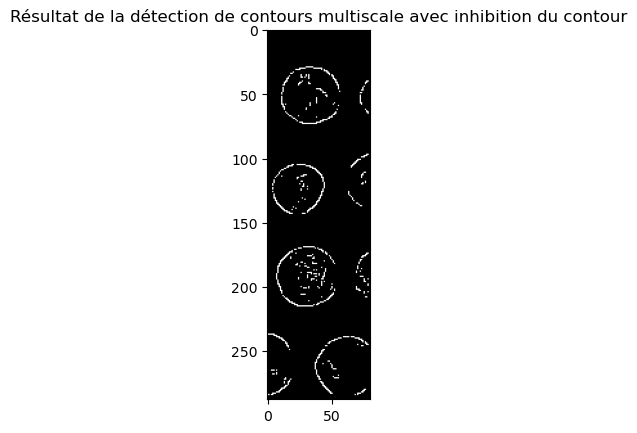

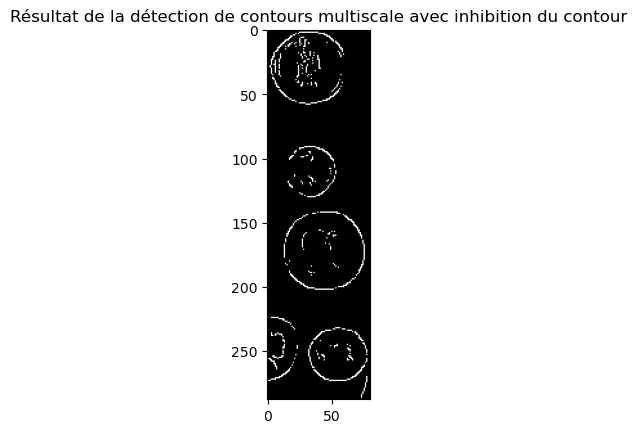

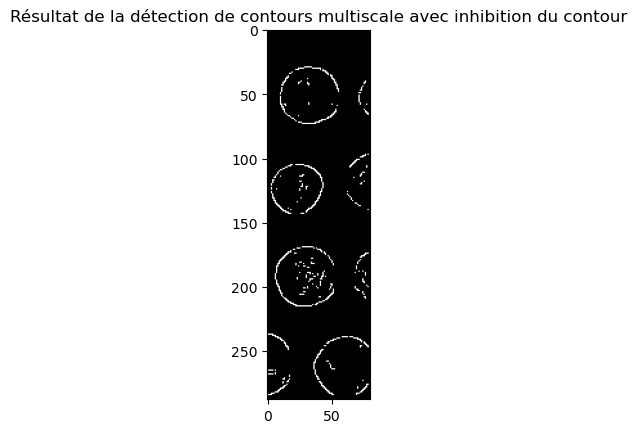

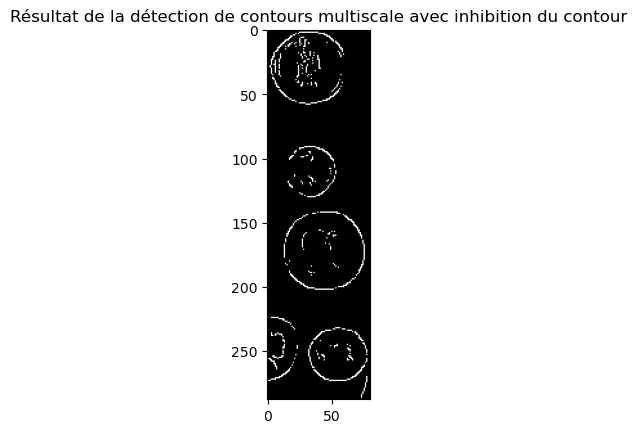

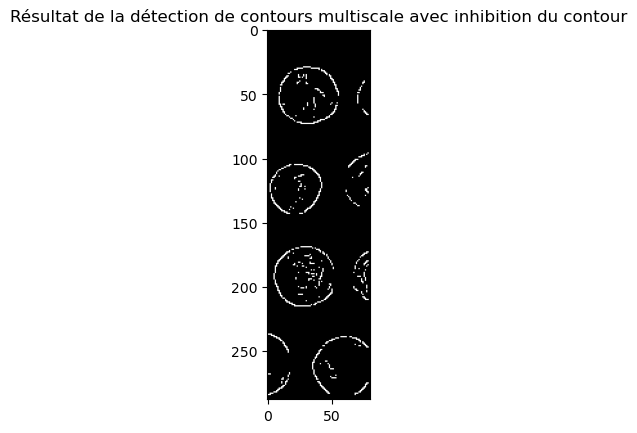

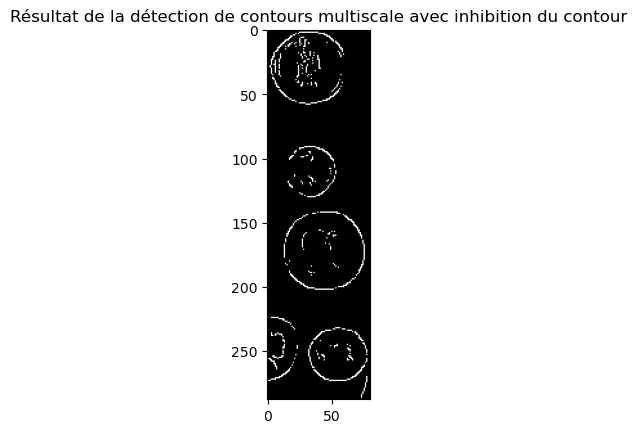

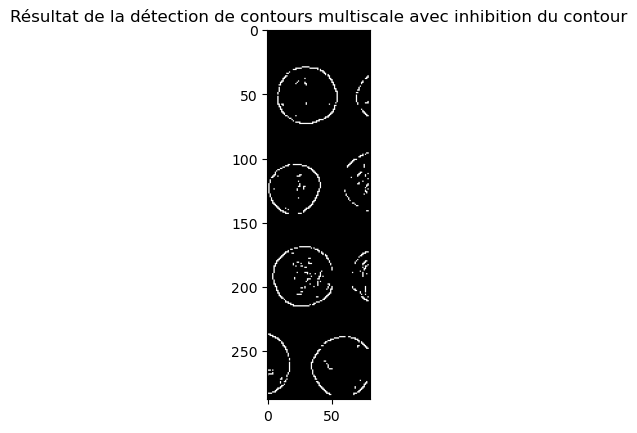

KeyboardInterrupt: 

In [9]:
import cv2
import numpy as np

def edge_distance(image1, image2):
    
    gray1 = image1
    gray2 = image2
    # Apply Canny edge detection
    edges1 = multi_scale_contour_detection_with_inhibition(gray1, N=3, sigma=1, alpha=0.001)
    edges2 = multi_scale_contour_detection_with_inhibition(gray2, N=3, sigma=1, alpha=0.001)

    # Calculate the distance between edge pixels in each image
    dist1 = cv2.distanceTransform(edges1, cv2.DIST_L2, 3)
    dist2 = cv2.distanceTransform(edges2, cv2.DIST_L2, 3)

    # Normalize distance maps
    cv2.normalize(dist1, dist1, 0, 1.0, cv2.NORM_MINMAX)
    cv2.normalize(dist2, dist2, 0, 1.0, cv2.NORM_MINMAX)

    # Compute the absolute difference between distance maps
    diff = cv2.absdiff(dist1, dist2)

    # Compute the similarity score
    similarity = np.sum(diff)

    return similarity

def template_matching(template, target):
    # Find template dimensions
    th, tw = template.shape[:2]

    # Slide template over the target image and calculate similarity scores
    best_similarity = float('inf')
    best_location = None
    for y in range(target.shape[0] - th):
        for x in range(target.shape[1] - tw):
            roi = target[y:y+th, x:x+tw]
            similarity = edge_distance(template, roi)
            if similarity < best_similarity:
                best_similarity = similarity
                best_location = (x, y)

    return best_location


if __name__ == "__main__":
    # Load images
    template_img = largeCoin
    target_img = image

    # Find the best location for template matching
    best_loc = template_matching(template_img, target_img)

    # Draw rectangle around the matched region
    tw, th = template_img.shape[:2]
    cv2.rectangle(target_img, best_loc, (best_loc[0] + tw, best_loc[1] + th), (0, 255, 0), 2)

    # Display result
    cv2.imshow('Template Matching', target_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
